In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1Gqe40iOinVJ8TTKpOGQQIvSxLtgLGDNX"
output_file = "Pothole_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Gqe40iOinVJ8TTKpOGQQIvSxLtgLGDNX
From (redirected): https://drive.google.com/uc?id=1Gqe40iOinVJ8TTKpOGQQIvSxLtgLGDNX&confirm=t&uuid=6d9f85f6-2e53-44e8-95b1-7a1392c339d9
To: /content/Pothole_Datasets.zip
100%|██████████| 81.3M/81.3M [00:02<00:00, 30.9MB/s]


'Pothole_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Pothole_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Pothole_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Pothole_Datasets' to 'datasets/Pothole_Datasets' successfully.


## **Importing libraries**

In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Pothole_Datasets',
    'train': 'train/images',
    'val': 'train/images',
    'test': 'test/images',
    'nc': 1,
    'names': ['pothole']
}

# Save to pothole.yaml
with open('pothole.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("pothole.yaml created successfully!")


pothole.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolo11l.pt')  # 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model and save only the best checkpoint
model.train(
    data='pothole.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='pothole_yolov8',
    save=True,
    save_period=-1,  # Don't save every epoch
    patience=20,     # Early stopping if no improvement for 20 epochs (optional)
    val=False         # Run validation during training to select best model
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.0M/49.0M [00:00<00:00, 111MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pothole.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     


  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  2   1455616  ultralytics.nn.modules.block.C2PSA           [512, 512, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   2496512  ultralytics.nn.modules.block.C3k2            [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 34.8±8.6 MB/s, size: 71.4 KB)


train: Scanning /content/datasets/Pothole_Datasets/train/labels... 985 images, 0 backgrounds, 0 corrupt: 100%|██████████| 985/985 [00:01<00:00, 564.93it/s]

train: New cache created: /content/datasets/Pothole_Datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 168.0±252.4 MB/s, size: 73.2 KB)


val: Scanning /content/datasets/Pothole_Datasets/train/labels.cache... 985 images, 0 backgrounds, 0 corrupt: 100%|██████████| 985/985 [00:00<?, ?it/s]


Plotting labels to runs/detect/pothole_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/pothole_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.39G      2.117      2.491       2.25          2        640: 100%|██████████| 124/124 [00:51<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.54G      2.152       2.46      2.241          2        640: 100%|██████████| 124/124 [00:51<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.68G      2.106      2.469      2.208          1        640: 100%|██████████| 124/124 [00:48<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.68G      2.023      2.401      2.159          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.68G      2.018      2.322      2.145          4        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.81G      1.974      2.246      2.075          3        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.81G      1.917       2.14      2.046          4        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.81G      1.909      2.121       2.03          6        640: 100%|██████████| 124/124 [00:49<00:00,  2.48it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.81G      1.863      2.076       2.01          7        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.98G      1.849      2.019      1.994          6        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.98G      1.828      2.008      1.978         33        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.98G      1.824      1.976      1.955          4        640: 100%|██████████| 124/124 [00:49<00:00,  2.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.98G      1.778      1.915      1.952          4        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.98G      1.799      1.954      1.973          5        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.98G      1.792      1.942      1.955          1        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.98G      1.755      1.853      1.913          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.98G       1.77      1.856      1.926          1        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.98G      1.751       1.84      1.893         35        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.98G      1.742      1.791       1.89          1        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.98G      1.718      1.764      1.883          8        640: 100%|██████████| 124/124 [00:49<00:00,  2.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.98G      1.706      1.754       1.86          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.98G      1.675      1.737      1.862          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.98G      1.693      1.739      1.882          5        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.98G      1.692      1.722      1.876          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.98G      1.663      1.685       1.86          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.98G      1.674      1.666      1.842          6        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.98G      1.655      1.664      1.851          3        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.98G      1.665      1.653      1.851          9        640: 100%|██████████| 124/124 [00:49<00:00,  2.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.98G       1.66      1.662      1.848          6        640: 100%|██████████| 124/124 [00:48<00:00,  2.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.98G      1.624      1.567      1.825          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.98G       1.63       1.56      1.823          3        640: 100%|██████████| 124/124 [00:48<00:00,  2.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.98G      1.604      1.556      1.813          3        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.98G      1.616      1.577      1.821         12        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.98G      1.594      1.499      1.791          7        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.98G      1.582      1.517      1.806          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.98G      1.611      1.494      1.801         11        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.98G      1.577      1.479      1.787          4        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.98G       1.57      1.457      1.793          4        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.98G      1.559      1.432      1.764          2        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.98G      1.549      1.439      1.767          4        640: 100%|██████████| 124/124 [00:49<00:00,  2.49it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.98G      1.607      1.399       1.89         14        640: 100%|██████████| 124/124 [00:49<00:00,  2.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.98G      1.561      1.343      1.861          7        640: 100%|██████████| 124/124 [00:48<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.98G      1.564      1.311      1.849          1        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.98G      1.536       1.24      1.842         19        640: 100%|██████████| 124/124 [00:49<00:00,  2.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.98G      1.524      1.225       1.84          3        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.98G      1.511      1.217      1.827          1        640: 100%|██████████| 124/124 [00:49<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.98G       1.48      1.176      1.788          2        640: 100%|██████████| 124/124 [00:48<00:00,  2.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.98G       1.49      1.172      1.809          1        640: 100%|██████████| 124/124 [00:49<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.98G      1.477       1.16      1.805          1        640: 100%|██████████| 124/124 [00:48<00:00,  2.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.98G      1.446      1.123      1.772          1        640: 100%|██████████| 124/124 [00:49<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:23<00:00,  2.64it/s]


                   all        985       3795       0.81      0.788      0.864      0.511

50 epochs completed in 0.755 hours.
Optimizer stripped from runs/detect/pothole_yolov8/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/pothole_yolov8/weights/best.pt, 51.2MB

Validating runs/detect/pothole_yolov8/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:20<00:00,  3.06it/s]


                   all        985       3795      0.809      0.789      0.864      0.511
Speed: 0.3ms preprocess, 14.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/pothole_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79aa78f31a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
def draw_boxes(image, box, label, color_sample):

    image_with_boxes = image.copy()

    xmin, ymin, xmax, ymax = map(int, box)

    # Ensure correct indexing
    color = random.choice(color_sample)

    # Draw bounding box
    cv2.rectangle(image_with_boxes, (xmin, ymin), (xmax, ymax), color, 2)

    # Draw label text
    text = label
    text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 3)
    text_w, text_h = text_size

    # Adjust text position to prevent out-of-bounds
    ymin_text = max(ymin - text_h - 5, 0)

    # Background rectangle for text
    cv2.rectangle(image_with_boxes, (xmin, ymin_text-5), (xmin + text_w + 10, ymin), color, -1)

    # Put text on the image with white color for better visibility
    cv2.putText(
        image_with_boxes,
        text,
        (xmin + 5, ymin - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 0),  # White text
        2,
        cv2.LINE_AA,
    )

    return image_with_boxes


image 1/1 /content/datasets/Pothole_Datasets/test/damaged-american-road-surface-with-deep-pothole-ruined-stree.jpg: 448x640 1 pothole, 73.0ms
Speed: 3.4ms preprocess, 73.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/Pothole_Datasets/test/pot-hole (7).jpg: 448x640 2 potholes, 18.8ms
Speed: 2.8ms preprocess, 18.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/Pothole_Datasets/test/pothole-on-a-road-resulting-in-hazardous-driving-conditions.jpg: 448x640 1 pothole, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/Pothole_Datasets/test/dirty-puddles-in-a-potholes-on-an-old-road.jpg: 640x480 6 potholes, 57.4ms
Speed: 2.3ms preprocess, 57.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/datasets/Pothole_Datasets/test/old-highway-with-holes-and-snow-landscape-road-pothole

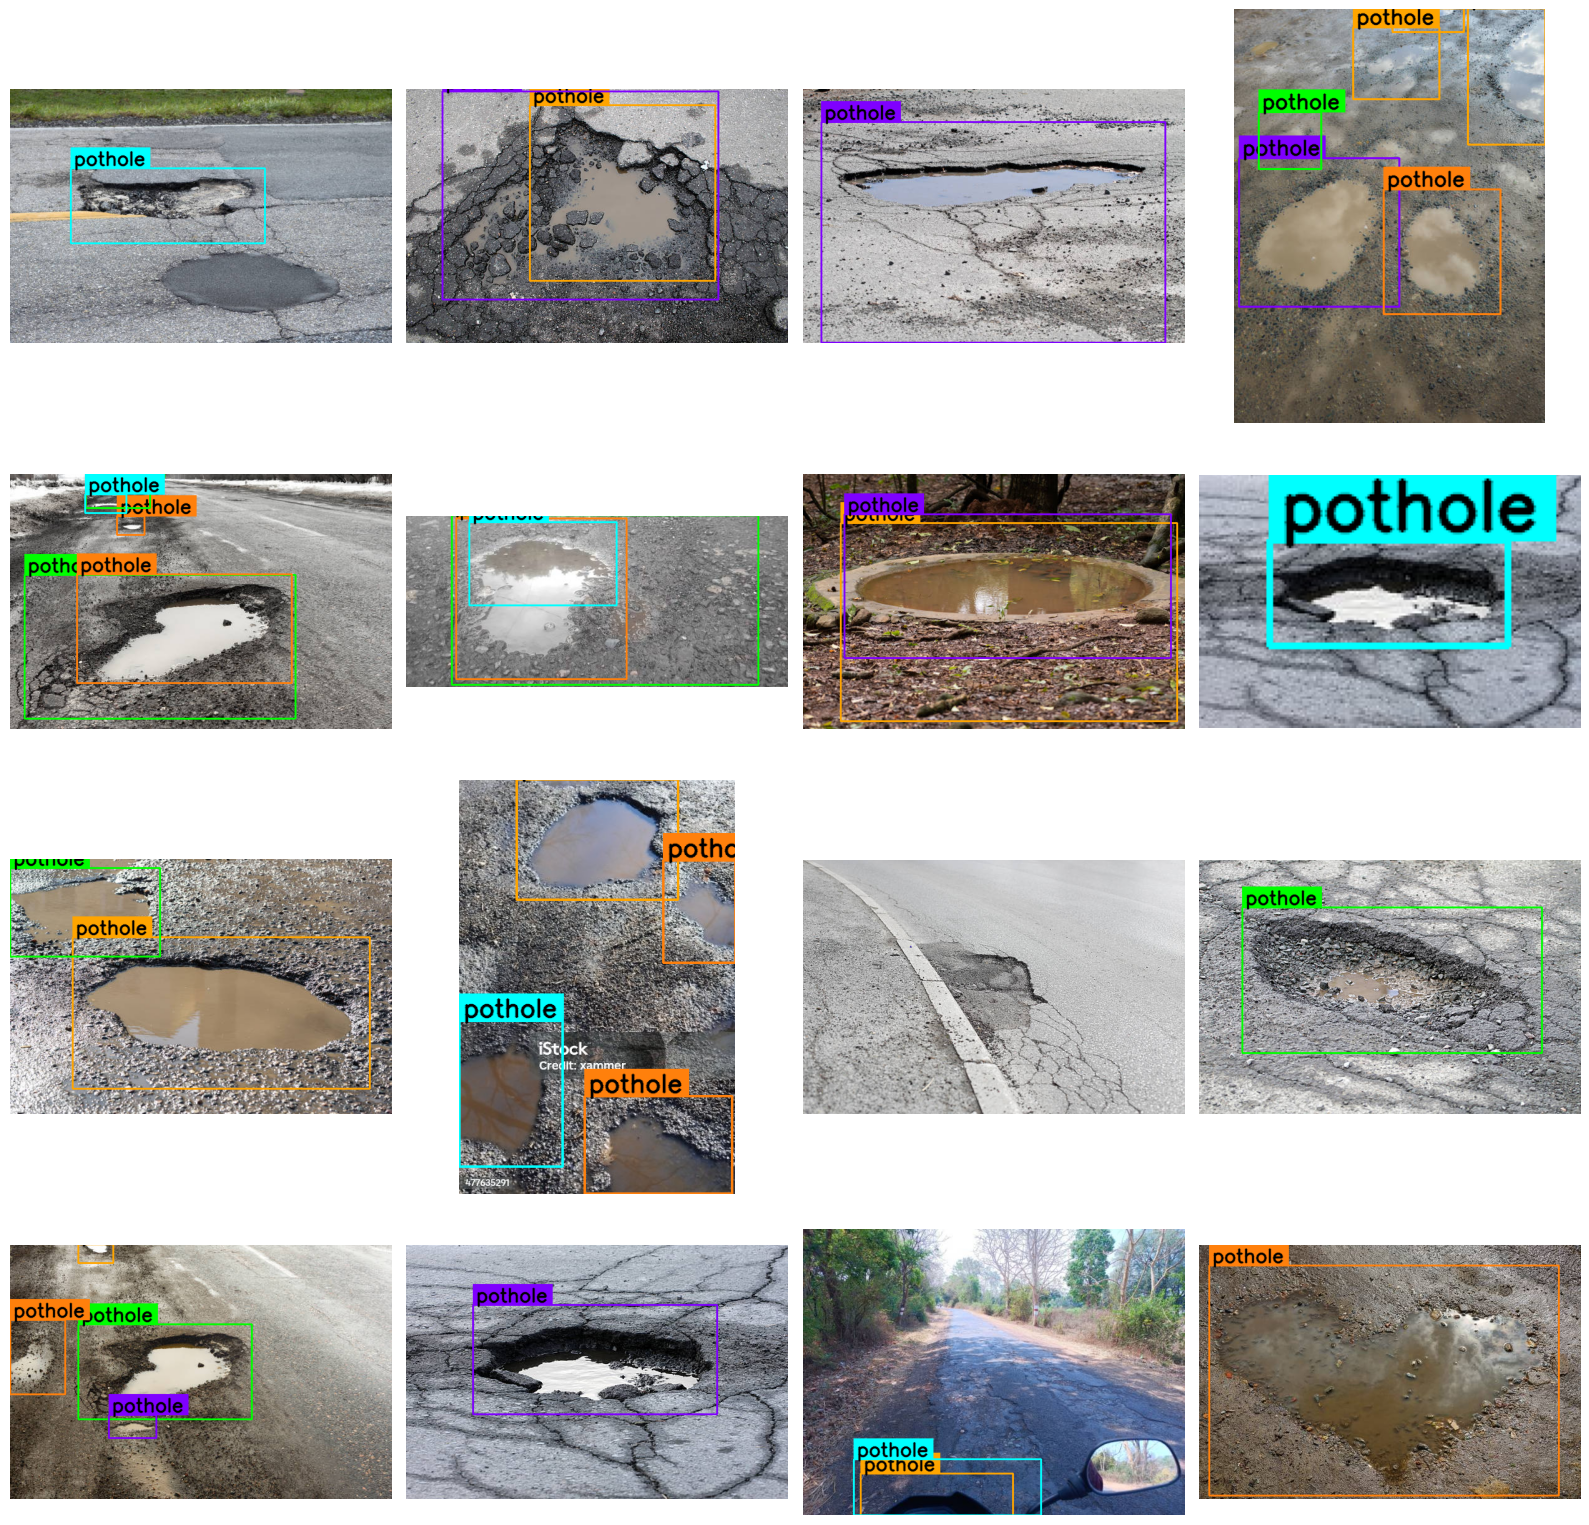

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/detect/pothole_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'datasets/Pothole_Datasets/test'

color_sample = [
    (12, 128, 255),   # Orange-ish
    (255, 0, 127),    # Pink
    (0, 255, 0),      # Green
    (255, 255, 0),    # Cyan
    (0, 165, 255)     # Blue-ish
]

# Get list of test images (max 16)
image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)

    # Inference
    results = model(img_path)[0]  # Get first result (one image)

    # Draw each box if confidence > 0.8
    for box in results.boxes:

        xyxy = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = model.names[cls_id]
        image = draw_boxes(image, xyxy, label, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
